In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Loading csv type data of Hand Written Digits

In [15]:
X = np.loadtxt('data.csv', delimiter = ',')
Y = np.loadtxt('label_mx10.csv', delimiter = ',')
Yr = np.loadtxt('label.csv', delimiter= ',')

X = X.T
Y = Y.T

In [16]:
print(X.shape, Y.shape)

(784, 10000) (10, 10000)


# Visualizing images from dataset randomly

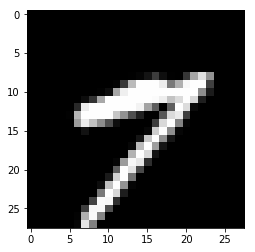

In [17]:
index = int(random.randrange(0,X.shape[1]))
plt.imshow(X[:, index].reshape((28,28)),cmap='gray')
plt.show()

# Sigmoid and initialization with zeros

In [18]:
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

In [19]:
w = np.zeros((10,784))
b = np.zeros((10,1))

# Cost Function

In [20]:
def compute_cost(w,b,x, y):
    m = x.shape[1]
    z = np.dot(w, X) + b
    a = sigmoid(z)
    cost = -(1/m)*np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    dw =  (1/m)*np.dot((a-y), X.T)
    db = (1/m)*np.sum((a - y), axis = 1)
    db = np.reshape(db, (10,1))
    
    return cost, dw, db

# Gradient

In [21]:
def grad(w, b, x, y, learning_rate, iterations):

    cost_list = []
    for i in range(iterations + 1):
        cost, dw, db = compute_cost(w, b, x, y)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        cost_list.append(cost)
        
        if i%(iterations/10) == 0 :
            print("Cost after ", i ,"iterations is ", cost)
    
    return w, b, cost_list

# Model implementation

In [22]:
iter = 50
starttime = time.time()
W, B, Cost_list = grad(w, b, X, Y, learning_rate = 0.000015, iterations = iter)
endtime = time.time()

times = endtime - starttime
mintimes = times/60
if times > 200:
    print("Time taken is %.2f" %mintimes, "minutes")
else :
    print("Time taken is %.2f" %times, "seconds")

Cost after  0 iterations is  6.931471805599453
Cost after  50 iterations is  0.9068606753515144
Cost after  100 iterations is  0.8166161239864528
Cost after  150 iterations is  0.7739922903160867
Cost after  200 iterations is  0.7472157299438925
Cost after  250 iterations is  0.7280437306596556
Cost after  300 iterations is  0.7132294617610933
Cost after  350 iterations is  0.7011996757332629
Cost after  400 iterations is  0.6910866496007614
Cost after  450 iterations is  0.6823667478571757
Cost after  500 iterations is  0.6747021936995031
Time taken is 18.54 minutes


# Ploting Cost function v/s Iterations

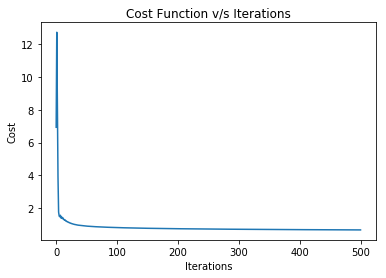

In [23]:
t = np.arange(0, iter+1)
plt.plot(t, Cost_list)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function v/s Iterations')
plt.show()

# For Training set

In [24]:
z_prob = np.dot(W, X) + B
a_prob = sigmoid(z_prob)
a_pred  = a_prob.max(0)
y_pred = []

for i in range(z_prob.shape[1]):
    for j in range(z_prob.shape[0]):
        if a_prob[j][i] == a_pred[i]:
            y_pred.append(j)

y_pred = np.array(y_pred)
Y_pred = np.reshape(y_pred, (z_prob.shape[1],1))

# Training Accuracy

In [25]:
accuracy = np.mean(Yr == Y_pred.T)*100
print("Our accuracy is %.2f" % accuracy, "%")

Our accuracy is 92.27 %


# For Test set

In [26]:
X_t = np.loadtxt('test_X_1000.csv', delimiter = ',')
Y_t = np.loadtxt('test_label_1000.csv', delimiter = ',')

X_t = X_t.T
Y_t = np.reshape(Y_t, (1,1000))

In [27]:
z_test_prob = np.dot(W, X_t) + B
a_test_prob = sigmoid(z_test_prob)
a_test_pred = a_test_prob.max(0)
y_test_pred = []

for i in range(z_test_prob.shape[1]):
    for j in range(z_test_prob.shape[0]):
        if a_test_prob[j][i] == a_test_pred[i]:
            y_test_pred.append(j)
            
y_test_pred = np.array(y_test_pred)
y_test_pred = np.reshape(y_test_pred, (z_test_prob.shape[1], 1))

# Test Accuracy

In [28]:
accuracy = np.mean(y_test_pred == Y_t.T)*100
print("Our Test accuracy is %.2f" %accuracy, "%")

Our Test accuracy is 92.50 %


# Lets visualize our Test set accuracy

AI (our algorithm says) : This is  [6]


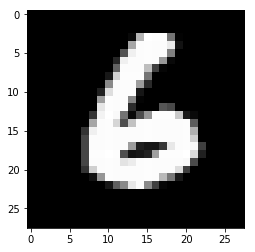

In [21]:
index = random.randrange(z_test_prob.shape[1])

plt.imshow(X_t[:,index].reshape(28,28), cmap = 'gray')
print("AI (our algorithm says) : This is ", y_test_pred[index,:])
plt.show()

# Accuracy History

    For learning_rate = .000015
 For iter = 50,   train = 92.40% , test = 87.40% 
 
 For iter = 500,  train = 99.10% , test = 88.00%
 
 For iter = 1000, train = 99.90% , test = 87.50%
 
    For learning_rate = 0.00002
 For iter = 1000, train = 99.90 , test = 87.30%